<a href="https://colab.research.google.com/github/atobrak/Theory-of-seismic-waves/blob/main/2D_wave_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive

/content/drive


In [3]:
cd MyDrive/

/content/drive/MyDrive


In [4]:
cd seismic_waves_1D

/content/drive/MyDrive/seismic_waves_1D


In [5]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt



In [6]:
# rudimentary parameters

nt = 2500
nx = 601
nz = nx

c = 343.0
courant_number = 0.60
sx = int(nx/2) # center x
sz = int(nz/2) # center z
#f0 = 200.0
xmax = 600


inter_bound = 300 # describe loaction when material properties change.

In [7]:
# initialize pressure field

ap = np.zeros((nx, nz), dtype = float)
apnew = np.zeros((nx, nz), dtype = float)
apold = np.zeros((nx, nz), dtype = float)
ad2px = np.zeros((nx, nz), dtype = float)
ad2pz = np.zeros((nx, nz), dtype = float)


#ap_sec = -np.abs(ap[int(nx/2):nx, 1:int(nz/2)].T)

In [8]:
# initializing domain
dx = xmax/(nx-1)
x = np.arange(0,nx) * dx
z = np.arange(0, nx) * dx
dt = courant_number * dx/c

In [9]:
dx

1.0

In [10]:
dt

0.001749271137026239

In [11]:
#x

In [12]:
# def ricker(f, size, dt=1):
#     t = np.int_(np.linspace(-size, size, (2*size+1)/dt))
#     y = (1.0 - 2.0*(np.pi**2)*(f**2)*(t**2)) * np.exp(-(np.pi**2)*(f**2)*(t**2))
#     data = np.hstack((t[:,np.newaxis],y[:,np.newaxis]))
#     return data

In [13]:
# source initialization
t = np.arange(1, nt+1) * dt

t0 = 0.5
f = 10






# spatial source function

sg = np.zeros((nx, nz), dtype = float)
sigma = 1.5 * dx
x0 = x[sx-1]
z0 = z[sz-1]

for i in range(nx):
  for j in range(nz):
    #sg[i,j] = np.exp(((x[i]-x0)**2 + (z[j]-z0)**2))
    sg[i,j] = np.exp(-1/sigma**2 *((x[i]-x0)**2 + (z[j]-z0)**2))



#sg = sg
sg = sg/np.amax(sg)


In [14]:
from matplotlib.cm import ScalarMappable

In [15]:
import matplotlib.animation as animation



In [16]:
P_global2 = np.zeros((nx, nz,nt), dtype = float)

In [17]:
p_min = np.min(P_global2)
p_max = np.max(P_global2)

In [18]:
f = P_global2.shape[2]
print(f)

2500


In [19]:
#P_global2 = np.zeros((nx, nz,nt), dtype = float)

In [20]:

# change c1 and c2 to simulate propagation through heterogeneous media
c1 = 343 
c2 = 343
dz = dx

In [21]:
for n in range(nt):

  for i in range(2, nz-2):
    if int(i * dx) <= inter_bound:


    #   ad2px[i,:] = dt**2 * c1**2 *((-1.0/12*ap[i+2,:] + 4.0/3*ap[i+1,:] -5.0/2*ap[i,:] + 4.0/3*ap[i-1,:] - 1.0/12*ap[i-2,:])/dx**2)
    # else:
    #   ad2px[i,:] = dt**2 * c2**2 *((-1.0/12*ap[i+2,:] + 4.0/3*ap[i+1,:] -5.0/2*ap[i,:] + 4.0/3*ap[i-1,:] - 1.0/12*ap[i-2,:])/dx**2)


      ad2px[i,:] = dt**2 * c1**2 *(ap[i+1,:] -2*ap[i,:] + ap[i-1,:] )
    else:
      ad2px[i,:] = dt**2 * c2**2 *(ap[i+1,:] -2*ap[i,:] + ap[i-1,:]) 

  for j in range(2, nx-2):

    if (j * dz) <= inter_bound:

      ad2pz[:,j] = dt**2 * c1**2 * (ap[:,j+1] -2*ap[:,j] + ap[:,j-1]) 
    else:
      ad2pz[:,j] = dt**2 * c2**2 * (ap[:,j+1] -2*ap[:,j] + ap[:,j-1]) 

    
  

  apnew = 2*ap - apold + (ad2px + ad2pz)
  apnew = apnew + sg * (-8 * f * ((n*dt)-t0) * np.exp(-4 * (f**2) *((n*dt)-t0)**2)) * dt**2
  apold , ap = ap , apnew

  P_global2[:,:,n] = ap














In [22]:
p_max = np.max(P_global2)
p_max

3.271572930398867e-07

In [23]:
p_min = np.min(P_global2)
p_min

-3.1609564741679092e-06

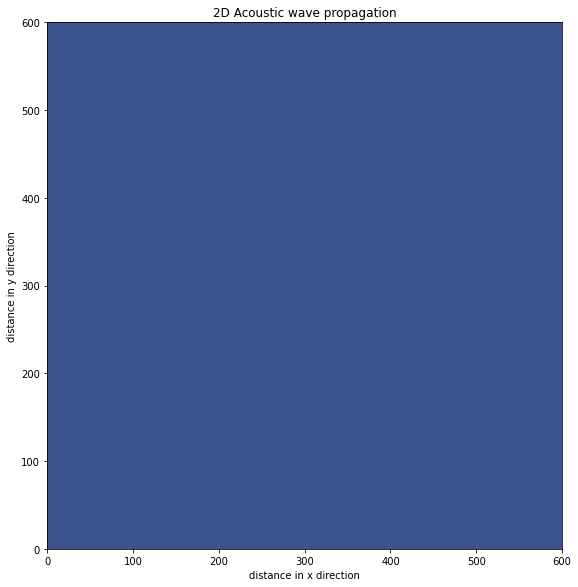

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
#data = np.random.randn(800).reshape(10, 10, 8)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set(ylim=(p_min, p_max))

def animate(i):
  ax.clear()
  ax.contourf(x,z, P_global2[:, :, i])

  ax.set_xlabel('distance in x direction')
  ax.set_ylabel('distance in y direction')
  ax.set_title('2D Acoustic wave propagation')
  #fig.colorbar(ax=ax);


anim = animation.FuncAnimation(fig, animate, interval=100, frames = f)
#plt.xlabel('distance in x direction')
#plt.ylabel('distance in y direction')
#plt.colorbar()

plt.show()

In [25]:
anim.save('2D_acoustic_wave_contourplot3.mp4')